In [ ]:
import math
from queue import PriorityQueue
import networkx as nx
import matplotlib.pyplot as plt
import random
import csv
import time

# Define the list of nodes, with their latitude, longitude, and rating information
data = []

with open('tourism_with_id.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append({'name': row['Place_Name'], 'lat': float(row['Lat']), 'lon': float(row['Long']), 'rating': float(row['Rating'])})

# Generate a random sample of nodes with distinct values
num_nodes = 10
nodes = []
used_indices = set()

while len(nodes) < num_nodes:
    index = random.randint(0, len(data)-1)
    if index not in used_indices:
        nodes.append(data[index])
        used_indices.add(index)

# Define a function to calculate the distance between two points
def distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in km
    return d

# Define a function to calculate the total distance of a path
def path_distance(path):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += distance(nodes[path[i]]['lat'], nodes[path[i]]['lon'], 
                                   nodes[path[i+1]]['lat'], nodes[path[i+1]]['lon'])
    return total_distance

def path_rating(path):
    total_rating = 0
    for i in path:
        total_rating += nodes[i]['rating']
    return total_rating / len(path)

def cal_weight(path):
    total_weight = 0
    for i in range(len(path) - 1):
        total_weight += G.edges[path[i], path[i+1]]['total_weight']
    return total_weight
  
# Create a graph of nodes and edges
max_rating_avg = 0
max_distance = 0
min_rating_avg = 9999999
min_distance = 9999999
G = nx.Graph()
for i in range(len(nodes)):
    G.add_node(i, name=nodes[i]['name'], lat=nodes[i]['lat'], lon=nodes[i]['lon'], rating=nodes[i]['rating'])
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        d = distance(nodes[i]['lat'], nodes[i]['lon'], nodes[j]['lat'], nodes[j]['lon'])
        rating = (nodes[i]['rating'] + nodes[j]['rating']) / 2
        if d > max_distance:
          max_distance = d
        if rating > max_rating_avg:
          max_rating_avg = rating
        if d < max_distance:
          min_distance = d
        if rating < max_rating_avg:
          min_rating_avg = rating
        G.add_edge(i, j, weight=d, rating = rating, total_weight=0)


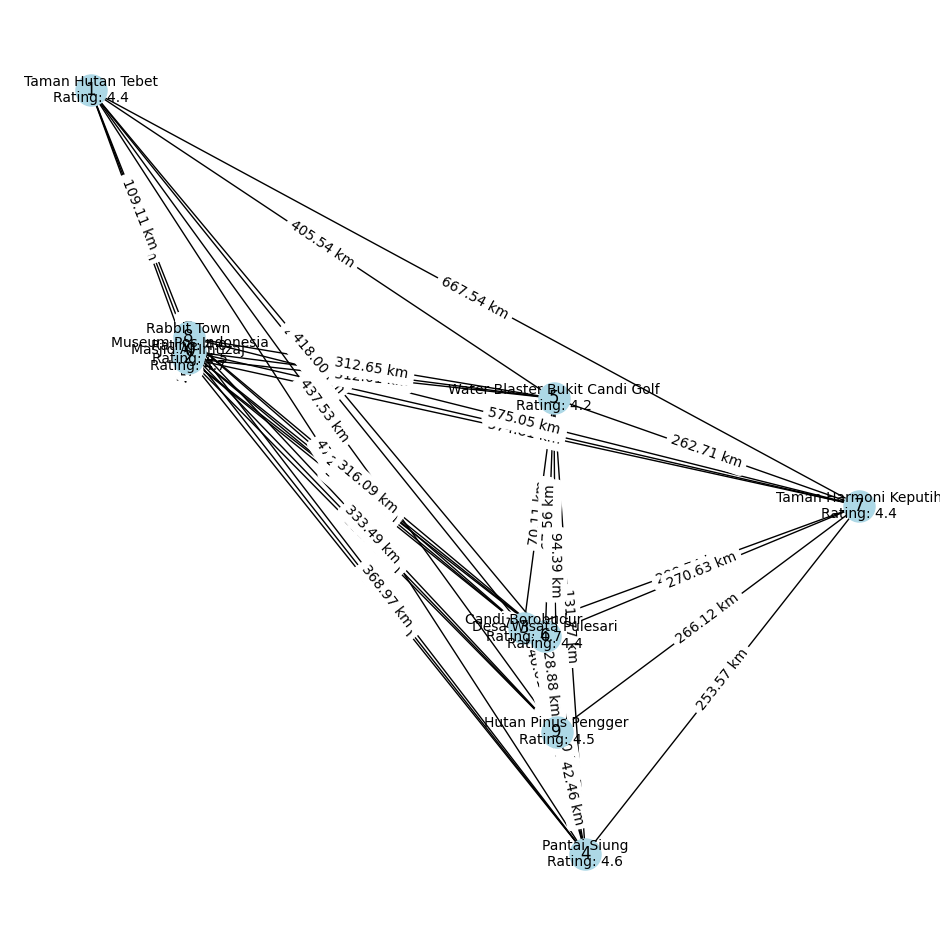

[{'name': 'Museum Pos Indonesia', 'lat': -6.902013, 'lon': 107.6197787, 'rating': 4.5}, {'name': 'Taman Hutan Tebet', 'lat': -6.2371409, 'lon': 106.8526505, 'rating': 4.4}, {'name': 'Masjid Al-Imtizaj', 'lat': -6.919425, 'lon': 107.6078639, 'rating': 4.7}, {'name': 'Candi Borobudur', 'lat': -7.6078738, 'lon': 110.2037513, 'rating': 4.7}, {'name': 'Pantai Siung', 'lat': -8.1818233, 'lon': 110.6832394, 'rating': 4.6}, {'name': 'Water Blaster Bukit Candi Golf', 'lat': -7.0218894, 'lon': 110.4383345, 'rating': 4.2}, {'name': 'Desa Wisata Pulesari', 'lat': -7.6258806, 'lon': 110.371698, 'rating': 4.4}, {'name': 'Taman Harmoni Keputih', 'lat': -7.2952211, 'lon': 112.8035603, 'rating': 4.4}, {'name': 'Rabbit Town', 'lat': -6.8669518, 'lon': 107.6100859, 'rating': 4.0}, {'name': 'Hutan Pinus Pengger', 'lat': -7.8704832, 'lon': 110.4599108, 'rating': 4.5}]


In [ ]:
# Draw the graph
fig, ax = plt.subplots(figsize=(12, 12))
pos = {i: (nodes[i]['lon'], nodes[i]['lat']) for i in range(len(nodes))}
nx.draw_networkx(G, pos=pos, node_color='lightblue', node_size=500, with_labels=True)

# Add node labels
node_labels = {i: f"{nodes[i]['name']}\nRating: {nodes[i]['rating']}" for i in range(len(nodes))}
nx.draw_networkx_labels(G, pos=pos, labels=node_labels, font_size=10)

# Add edge labels
edge_labels = {(i, j): f"{distance(nodes[i]['lat'], nodes[i]['lon'], nodes[j]['lat'], nodes[j]['lon']):.2f} km"
               for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=10)

# Show the graph
plt.axis('off')
plt.show()

print(nodes)


In [ ]:
# Obtain min and max values for distance and rating
min_distance = min(G.edges[u, v]['weight'] for u, v in G.edges)
max_distance = max(G.edges[u, v]['weight'] for u, v in G.edges)
min_rating_avg = min(G.edges[u, v]['rating'] for u, v in G.edges)
max_rating_avg = max(G.edges[u, v]['rating'] for u, v in G.edges)

distance_weight = 50
rating_weight = 50

# Modify the edge weights
for u, v in G.edges:
    distancee = G.edges[u, v]['weight']
    rating_avg = G.edges[u, v]['rating']

    # Normalize distance and rating between 0 and 1
    distance_normalized = (distancee - min_distance) / (max_distance - min_distance)
    rating_normalized = (rating_avg - min_rating_avg) / (max_rating_avg - min_rating_avg)

    # Calculate total weight using normalized values
    total_weight = (distance_weight * distance_normalized) - (rating_weight * rating_normalized)
    # print(rating_normalized)
    # Assign the total weight to the 'total_weight' attribute of the edge
    G.edges[u, v]['total_weight'] = total_weight


# **Simulated annealing**

In [ ]:
# Use simulated annealing to find the shortest path
def simulated_annealing(G, iterations=50):
    first_node = 0
    temperature = 1.0
    cooling_rate = 0.003
    tolerance = 0.001
    start_terminate = int(iterations / 2)
    my_list = list(range(num_nodes))
    wweight = []
    rrating = []
    ddistance = []
    path_hist = []
    best_iter = 0
    terminated = 6000
    current_iteration = 0
    same_best = 0
    # initial value
    current_path = [first_node] + random.sample(range(1, len(G.nodes)), int(num_nodes/2)-1)
    current_weight = cal_weight(current_path)
    current_distance = path_distance(current_path)
    best_path = current_path
    for i in range(iterations):
        if i == 0:
            best_weight = current_weight
            best_distance = current_distance 
        else:
            node_to_replace = random.choice(current_path[1:])
            available_nodes = set(my_list) - set(current_path)
            new_node = random.choice(list(available_nodes))
            current_path[current_path.index(node_to_replace)] = new_node
        current_weight = cal_weight(current_path)
        current_distance = path_distance(current_path)
        path_hist.append(current_path)
        for j in range(10):
            next_path = current_path.copy()
            # Swap two random nodes in the path
            node1, node2 = random.sample(range(1, len(current_path)), 2)  # exclude the first node
            next_path[node1], next_path[node2] = next_path[node2], next_path[node1]
            next_weight = cal_weight(next_path)
            delta = next_weight - current_weight
            if delta < 0 or math.exp(-delta/temperature) > tolerance:
                current_path = next_path
                current_weight = next_weight
                if current_weight < best_weight:
                    best_iter = i
                    best_path = current_path
                    best_weight = current_weight
                    best_rating = path_rating(current_path)
                    best_distance = current_distance
                    ddistance.append(best_distance)
                    wweight.append(best_weight)
                    rrating.append(best_rating)
            path_hist.append(current_path)
        temperature *= 1 - cooling_rate
        if i > start_terminate:
            if best_weight < current_weight:
                same_best += 1
                if same_best == 500:
                    terminated = i
                    break
            else:
                same_best = 0
        
    return best_path, ddistance, wweight, rrating, best_iter, terminated, path_hist

# Find the shortest path
start_time = time.time()
shortest_path, distance_stat, wweight_stat, rating_stat, best_iter, terminate, path_hist = simulated_annealing(G)
running_time = time.time() - start_time

# Print the order of visited nodes and the total distance
visited_nodes = [nodes[i]['name'] for i in shortest_path]
total_distance = cal_weight(shortest_path)
print("Order of shortest path", shortest_path)
print("Order of visited nodes:", visited_nodes)
print("Total weight:", total_distance )
print("Running time:", running_time, "seconds")

Order of shortest path [0, 2, 8, 3, 6]
Order of visited nodes: ['Museum Pos Indonesia', 'Masjid Al-Imtizaj', 'Rabbit Town', 'Candi Borobudur', 'Desa Wisata Pulesari']
Total weight: 47.37902177287961
Running time: 0.004739284515380859 seconds


In [ ]:
num_runs = 10
total_weight_sum = 0
total_runtime = 0

for run in range(num_runs):
    start_time = time.time()
    shortest_path, distance_stat, wweight_stat, rating_stat, best_iter, terminate, path_hist = simulated_annealing(G)
    running_time = time.time() - start_time
    total_weight_sum += cal_weight(shortest_path)
    total_runtime += running_time

average_weight = total_weight_sum / num_runs
average_runtime = total_runtime / num_runs

print("Average total weight:", average_weight)
print("Average running time:", average_runtime, "seconds")

Average total weight: 49.575689363162084
Average running time: 0.0031726837158203127 seconds


In [ ]:
import itertools

def brute_force_search():
    digits = list(range(1, num_nodes))
    f = int(num_nodes/2)-1
    all_node_combinations = list(itertools.permutations(digits, f))
    best_path = None
    best_weight = float('inf')
    print(all_node_combinations)
    print(len(all_node_combinations))

    # Evaluate the weight of each path and update the best path if necessary
    for node_combination in all_node_combinations:
        path = [0] + list(node_combination)  # Start with the first node fixed
        weight = cal_weight(path)
        if weight < best_weight:
            best_weight = weight
            best_path = path

    return best_path

# Find the best path using the brute force approach with 20 nodes
start_time = time.time()
shortest_path_brute_force = brute_force_search()
running_time = time.time() - start_time

print(shortest_path_brute_force)
print(cal_weight(shortest_path_brute_force))
print("Running time:", running_time, "seconds")

[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 3, 7), (1, 2, 3, 8), (1, 2, 3, 9), (1, 2, 4, 3), (1, 2, 4, 5), (1, 2, 4, 6), (1, 2, 4, 7), (1, 2, 4, 8), (1, 2, 4, 9), (1, 2, 5, 3), (1, 2, 5, 4), (1, 2, 5, 6), (1, 2, 5, 7), (1, 2, 5, 8), (1, 2, 5, 9), (1, 2, 6, 3), (1, 2, 6, 4), (1, 2, 6, 5), (1, 2, 6, 7), (1, 2, 6, 8), (1, 2, 6, 9), (1, 2, 7, 3), (1, 2, 7, 4), (1, 2, 7, 5), (1, 2, 7, 6), (1, 2, 7, 8), (1, 2, 7, 9), (1, 2, 8, 3), (1, 2, 8, 4), (1, 2, 8, 5), (1, 2, 8, 6), (1, 2, 8, 7), (1, 2, 8, 9), (1, 2, 9, 3), (1, 2, 9, 4), (1, 2, 9, 5), (1, 2, 9, 6), (1, 2, 9, 7), (1, 2, 9, 8), (1, 3, 2, 4), (1, 3, 2, 5), (1, 3, 2, 6), (1, 3, 2, 7), (1, 3, 2, 8), (1, 3, 2, 9), (1, 3, 4, 2), (1, 3, 4, 5), (1, 3, 4, 6), (1, 3, 4, 7), (1, 3, 4, 8), (1, 3, 4, 9), (1, 3, 5, 2), (1, 3, 5, 4), (1, 3, 5, 6), (1, 3, 5, 7), (1, 3, 5, 8), (1, 3, 5, 9), (1, 3, 6, 2), (1, 3, 6, 4), (1, 3, 6, 5), (1, 3, 6, 7), (1, 3, 6, 8), (1, 3, 6, 9), (1, 3, 7, 2), (1, 3, 7, 4), (1, 3, 7, 5), (1, 3, 7, 6), (1, 3, 7, 8), (1, 3

[-83.79149808003537, -83.96856528968195, -117.77040164020376, -131.73912133867853, -134.0358295225564]
[4.48, 4.4799999999999995, 4.58, 4.58, 4.58]


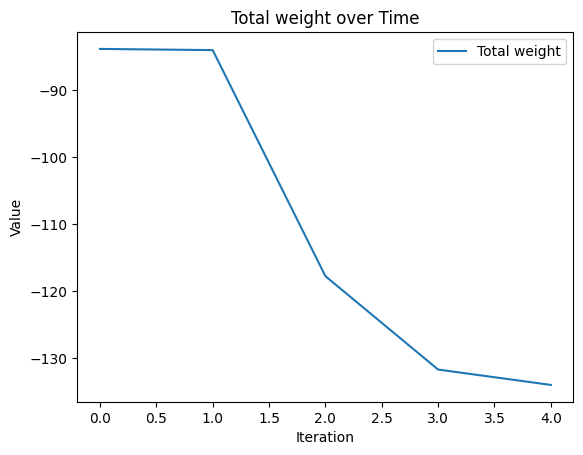

In [ ]:
print(wweight_stat)
print(rating_stat)

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the distance and rating data
ax.plot(wweight_stat, label='Total weight')

# Set the x and y axis labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('Value')
ax.set_title('Total weight over Time')

# Add a legend to the graph
ax.legend()

# Show the graph
plt.show()


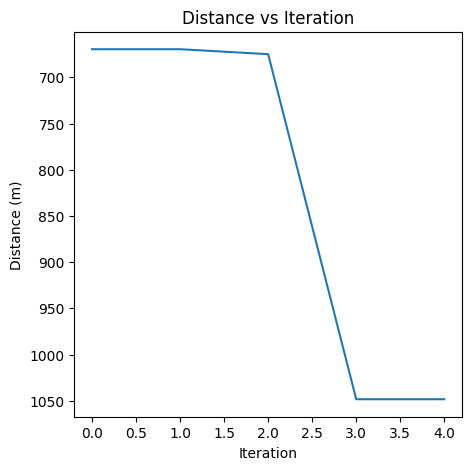

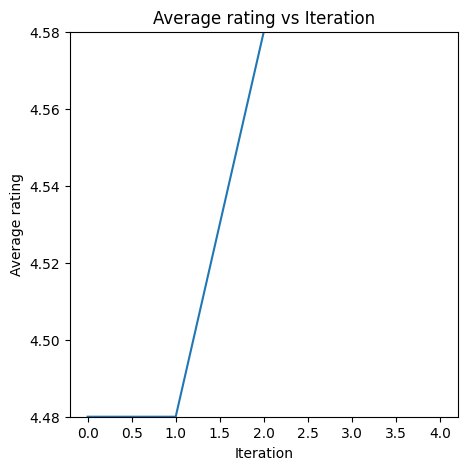

In [ ]:
# Plot the first graph
fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.plot(distance_stat)
ax1.invert_yaxis()
ax1.set_ylabel('Distance (m)')
ax1.set_xlabel('Iteration')
ax1.set_title('Distance vs Iteration')
plt.show()

# Plot the second graph
fig, ax2 = plt.subplots(figsize=(5, 5))
ax2.plot(rating_stat)
ax2.set_ylabel('Average rating')
ax2.set_xlabel('Iteration')
ax2.set_title('Average rating vs Iteration')
ax2.set_ylim(min(rating_stat), max(rating_stat))
plt.show()


# **Brute force**

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
from IPython.display import IFrame
from folium.plugins import AntPath

# Create a map centered on the first node's coordinates
latitude = nodes[0]['lat']
longitude = nodes[0]['lon']
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add markers with popups for all nodes
for index in range(len(nodes)):
    coord = location=[nodes[index]['lat'], nodes[index]['lon']]
    name = nodes[index]['name']
    rating = nodes[index]['rating']
    popup_text = f"<b>Node no:</b> {index}<br><b>Name:</b> {name}<br><b>Rating:</b> {rating}"
    folium.Marker(location=coord, icon=None, popup=folium.Popup(popup_text, min_width=300, max_width=300)).add_to(m)

# Create a list of coordinates from the nodes
coordinates = [[node['lat'], node['lon']] for node in nodes]

# Create a list of coordinates in the order specified by shortest_path
shortest_path_coords = [coordinates[index] for index in shortest_path]

# Draw lines connecting the nodes in the order specified by shortest_path
folium.PolyLine(locations=shortest_path_coords, color='red').add_to(m)

# Add markers with labels for the nodes in the order specified by shortest_path
for index, coord in enumerate(shortest_path_coords):
    name = nodes[shortest_path[index]]['name']
    rating = nodes[shortest_path[index]]['rating']
    order = index
    popup_text = f"<b>Node no:</b> {shortest_path[index]}<br><b>Name:</b> {name}<br><b>Rating:</b> {rating}<br><b>Traveling order:</b> {order}"
    folium.Marker(location=coord, icon=None, popup=folium.Popup(popup_text, min_width=300, max_width=300)).add_to(m)

# Draw a smooth ant path along the lines connecting the nodes
ant_path = AntPath(locations=shortest_path_coords, color='blue', weight=5)
ant_path.add_to(m)

m

# **Pareto**

In [ ]:
# change weight for each loop
avg = 0
pareto_distance = []
pareto_rating = []
for i in range(101):
  min_distance = min(G.edges[u, v]['weight'] for u, v in G.edges)
  max_distance = max(G.edges[u, v]['weight'] for u, v in G.edges)
  min_rating_avg = min(G.edges[u, v]['rating'] for u, v in G.edges)
  max_rating_avg = max(G.edges[u, v]['rating'] for u, v in G.edges)

  distance_weight = i
  rating_weight = 100 - i

  # Modify the edge weights
  for u, v in G.edges:
      distancee = G.edges[u, v]['weight']
      rating_avg = G.edges[u, v]['rating']

      # Normalize distance and rating between 0 and 1
      distance_normalized = (distancee - min_distance) / (max_distance - min_distance)
      rating_normalized = (rating_avg - min_rating_avg) / (max_rating_avg - min_rating_avg)

      # Calculate total weight using normalized values
      total_weight = (distance_weight * distance_normalized) - (rating_weight * rating_normalized)
      # Assign the total weight to the 'total_weight' attribute of the edge
      G.edges[u, v]['total_weight'] = total_weight

  shortest_path, distance_stat, wweight_stat, rating_stat, best_iter, terminate, path_hist = simulated_annealing(G)
  pareto_distance.append(distance_stat[-1])
  pareto_rating.append(rating_stat[-1])

  avg += min(wweight_stat)
  print(min(wweight_stat), distance_stat[-1], rating_stat[-1], distance_weight, rating_weight)
print("avg", avg/100)

-350.0 821.5365421578621 4.6 0 100
-337.69010514962196 452.32264558062644 4.6 1 99
-341.7532527900978 492.6964181750288 4.6 2 98
-337.32019427258695 381.8032495668794 4.6 3 97
-330.0346938064054 1077.1713597957892 4.6 4 96
-317.39061738498305 1042.201226507624 4.6 5 95
-313.56477701928566 1175.3702671862377 4.58 6 94
-311.1648887970168 1320.188431423794 4.58 7 93
-317.01301116039144 1077.4679765710705 4.6 8 92
-304.924239946857 782.710677101104 4.58 9 91
-308.76626395048925 1037.094203976668 4.6 10 90
-304.6428903455382 457.58504411120646 4.6 11 89
-292.6767643735872 1029.6282669261514 4.58 12 88
-285.02050776588834 911.5600368579483 4.58 13 87
-284.5117806580739 470.70296539911436 4.58 14 86
-280.42928880031735 782.710677101104 4.58 15 85
-248.4155637305185 467.80902934509993 4.539999999999999 16 84
-267.5909204118027 841.0406408442013 4.58 17 83
-268.1818132270475 458.5678944794015 4.58 18 82
-264.09932136929086 418.60380305482425 4.58 19 81
-259.4625556899379 752.1553725119343 4.58 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8888888888888911, 0.8888888888888911, 1.0, 0.8888888888888911, 1.0, 1.0, 0.8888888888888911, 0.8888888888888911, 0.8888888888888911, 0.8888888888888911, 0.6666666666666634, 0.8888888888888911, 0.8888888888888911, 0.8888888888888911, 0.8888888888888911, 0.7777777777777772, 0.7777777777777772, 0.8888888888888911, 1.0, 1.0, 0.6666666666666733, 0.5555555555555545, 1.0, 0.7777777777777772, 0.6666666666666683, 1.0, 1.0, 0.5555555555555545, 1.0, 1.0, 0.8888888888888911, 1.0, 0.6666666666666683, 1.0, 0.7777777777777772, 0.8888888888888911, 1.0, 0.5555555555555545, 0.7777777777777772, 0.8888888888888911, 1.0, 1.0, 0.8888888888888911, 0.8888888888888911, 1.0, 1.0, 0.6666666666666683, 1.0, 0.6666666666666683, 1.0, 0.7777777777777772, 0.8888888888888911, 1.0, 1.0, 0.8888888888888911, 0.8888888888888911, 1.0, 0.7777777777777772, 1.0, 0.7777777777777772, 1.0, 0.8888888888888911, 0.8888888888888911, 0.8888888888888911, 0.7777777777777821, 1.0, 0.4444444444444406, 0.44

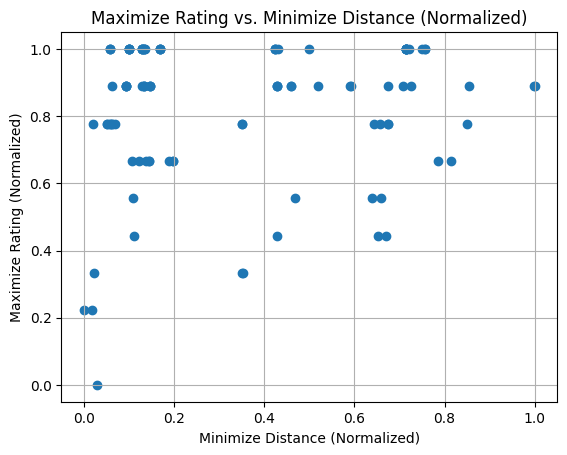

In [ ]:
# Find maximum values
max_pareto_rating = max(pareto_rating)
max_pareto_distance = max(pareto_distance)

# Normalize the data
normalized_pareto_rating = [(rating - min(pareto_rating)) / (max_pareto_rating - min(pareto_rating)) for rating in pareto_rating]
normalized_pareto_distance = [(distance - min(pareto_distance)) / (max_pareto_distance - min(pareto_distance)) for distance in pareto_distance]

print(normalized_pareto_rating)
print(normalized_pareto_distance)

# Plot the normalized data
plt.scatter(normalized_pareto_distance, normalized_pareto_rating)
plt.xlabel('Minimize Distance (Normalized)')
plt.ylabel('Maximize Rating (Normalized)')
plt.title('Maximize Rating vs. Minimize Distance (Normalized)')
plt.grid(True)
plt.show()